In [2]:
import numpy as np
import pandas as  pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Decision Tree'

In [4]:
my_data=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Sample.csv')
my_data[0:5]

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


In [52]:
my_data1=my_data[['ENGINE_SIZE', 'CYLINDERS','FUEL_CONSUMPTION']]
my_data1.columns[0:3]

Index(['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION'], dtype='object')

In [6]:
X=my_data[['ENGINE_SIZE', 'CYLINDERS','FUEL_CONSUMPTION']]
X[0:5]

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION
0,1.7,4,9.3
1,1.7,4,8.9
2,3.2,6,13.7
3,3.2,6,13.8
4,3.5,6,15.0


In [32]:
y=my_data[['VEHICLE CLASS']]
y[0:5]

,VEHICLE CLASS
0,COMPACT
1,COMPACT
2,COMPACT
3,MID-SIZE
4,MID-SIZE


In [101]:
from sklearn.model_selection import train_test_split
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.9,random_state=3)
makeTree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
makeTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
makeTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
predTree=makeTree.predict(X_testset)
print(predTree[0:5])
print(y_testset[0:5])

['PICKUP TRUCK - STANDARD' 'COMPACT' 'COMPACT' 'COMPACT'
 'PICKUP TRUCK - STANDARD']
               VEHICLE CLASS
264  PICKUP TRUCK - STANDARD
576               SUBCOMPACT
541                 MID-SIZE
111                  COMPACT
192  PICKUP TRUCK - STANDARD


In [104]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("The Accuracy is : ",metrics.accuracy_score(y_testset,predTree))

The Accuracy is :  0.32189542483660133


In [105]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

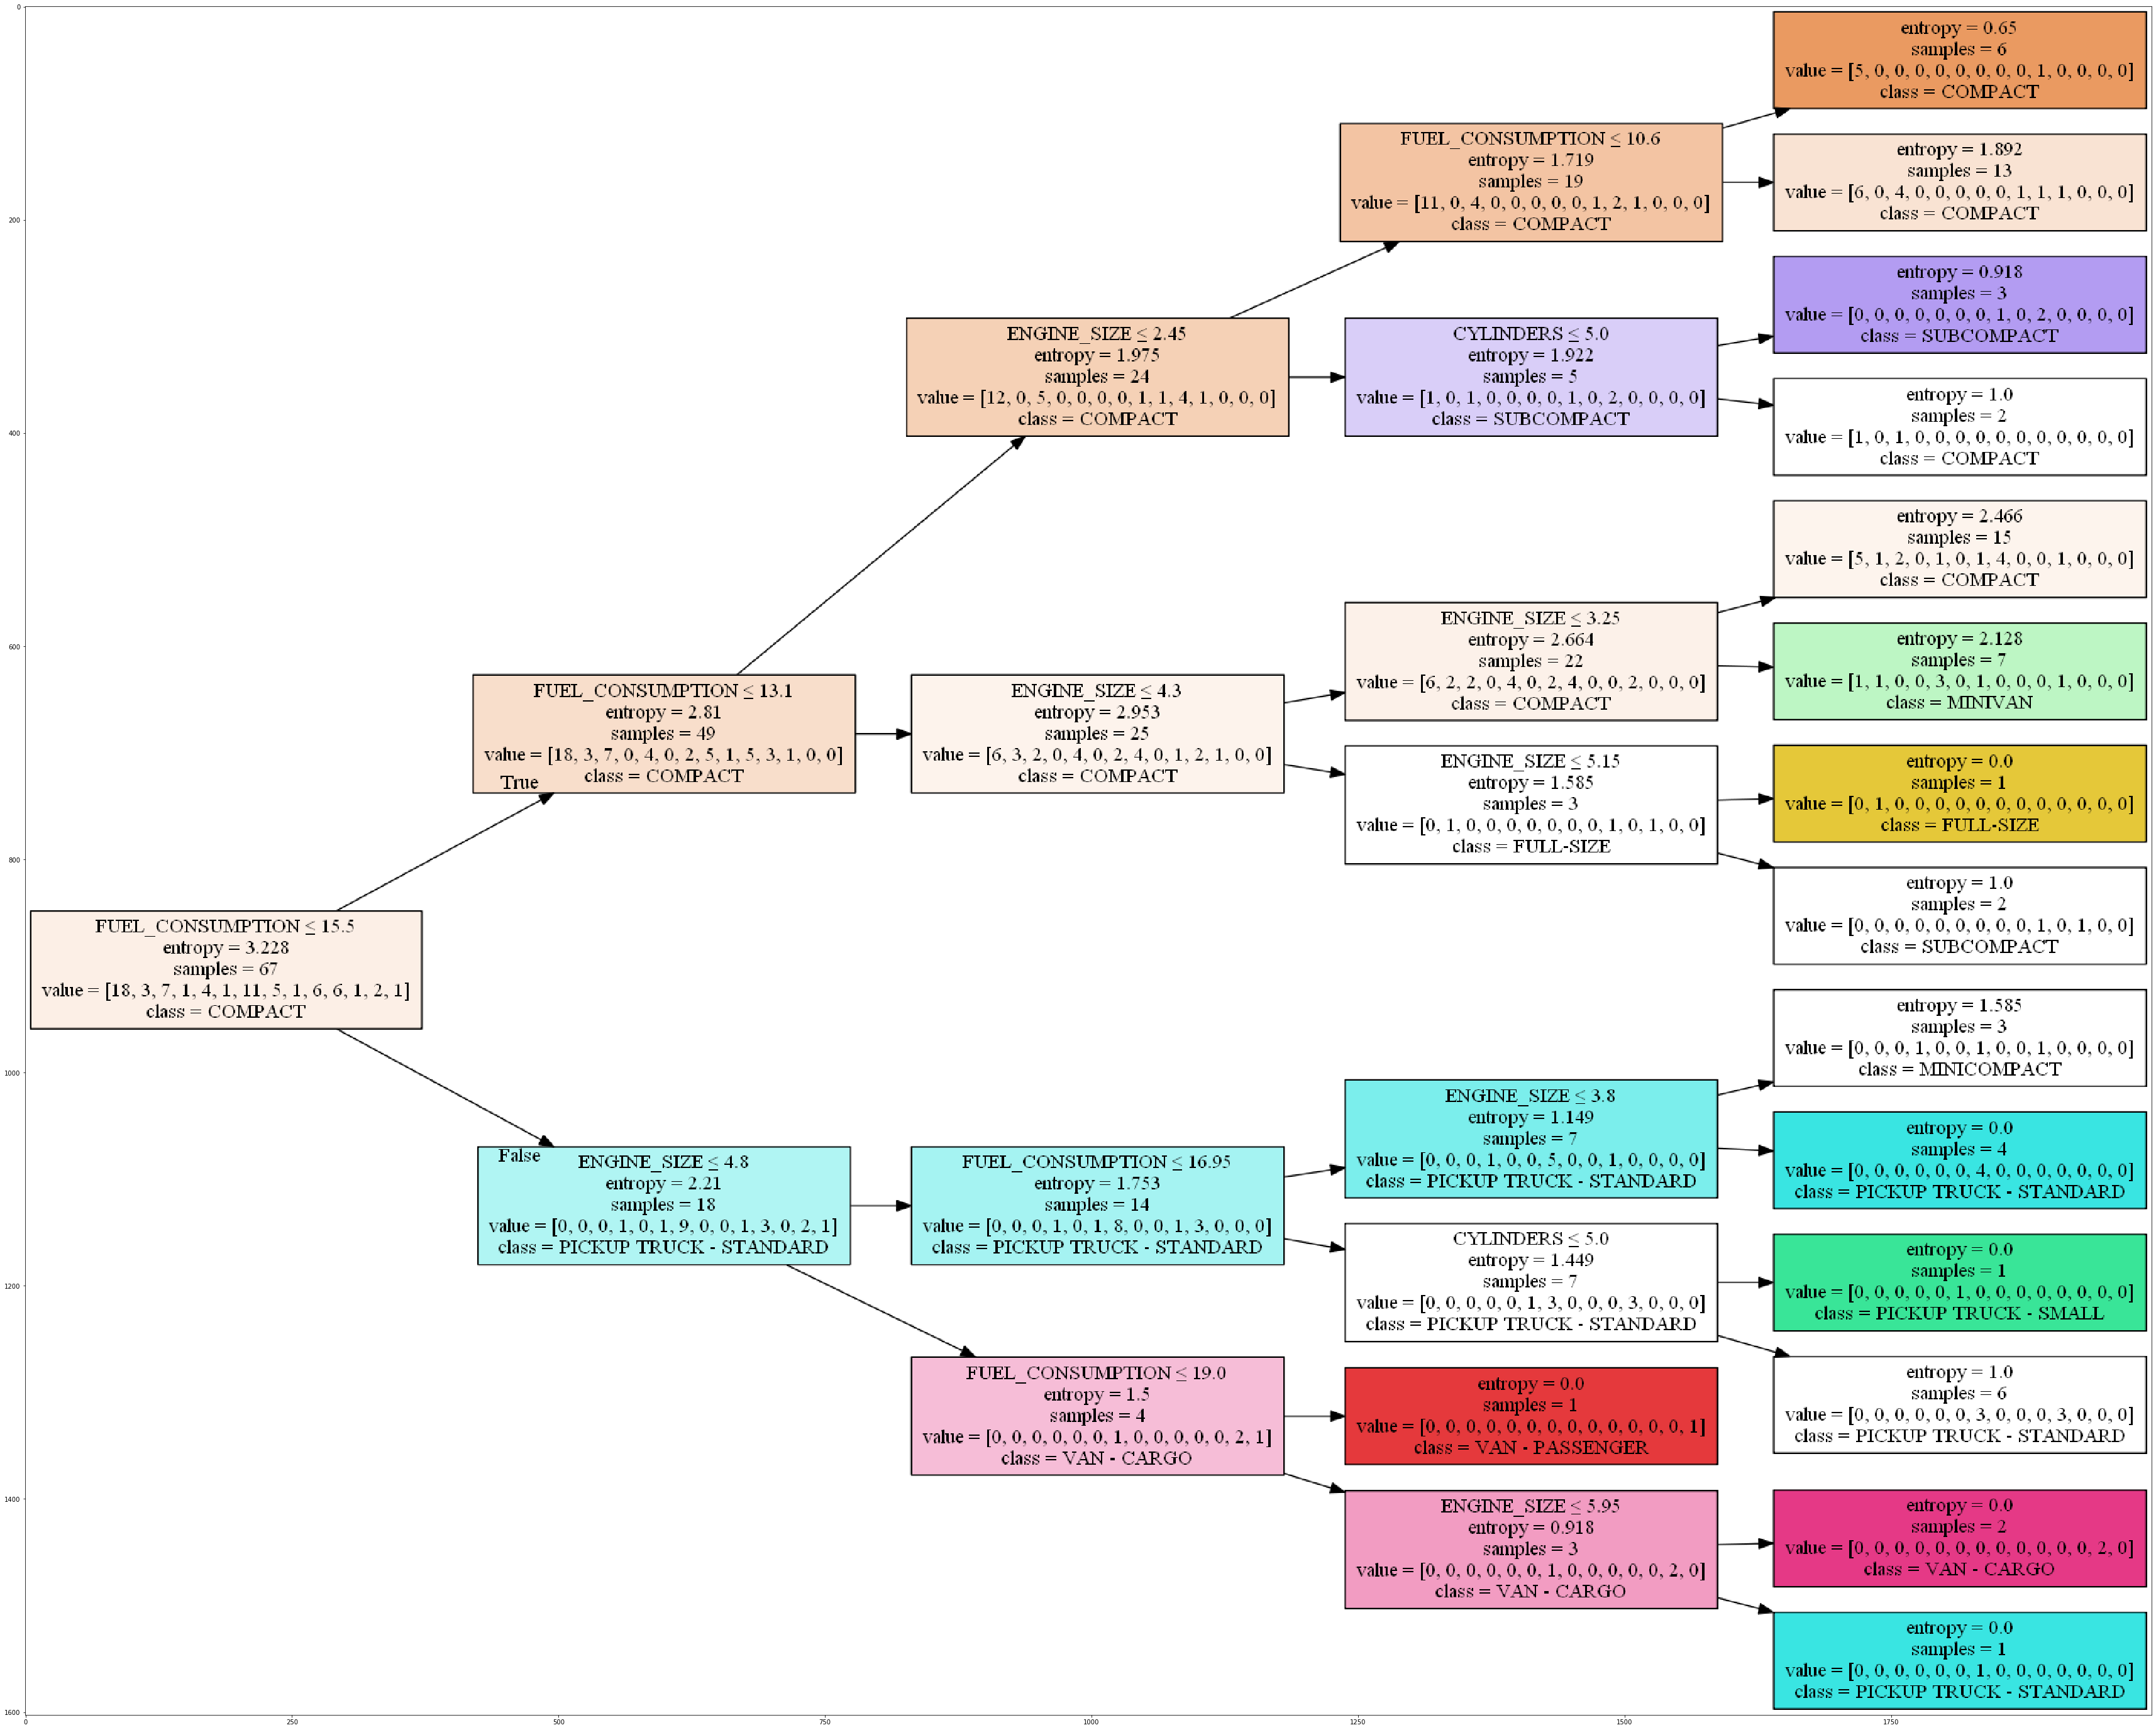

In [106]:
dot_data=StringIO()
filename='MakeTree.png'
featureNames=my_data1.columns[0:3]
targetNames=my_data["VEHICLE CLASS"].unique().tolist()
out=tree.export_graphviz(makeTree,feature_names=featureNames,out_file=dot_data,class_names=np.unique(y_testset),filled=True,special_characters=True,rotate=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(100,50))
plt.imshow(img,interpolation='nearest')
plt.show()